In [1]:
!pip install opendatasets --upgrade --quiet

In [ ]:
import pandas as pd
import os
import opendatasets as od
import datetime as dt
# from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Assign the Kaggle data set URL into variable
dataset = 'https://www.kaggle.com/datasets/saketk511/2019-2024-us-stock-market-data'
# Using opendatasets let's download the data sets
od.download(dataset )

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rajabhi1
Your Kaggle Key: ··········


100%|██████████| 155k/155k [00:00<00:00, 45.8MB/s]

In [ ]:
df = pd.read_csv("/content/2019-2024-us-stock-market-data/Stock Market Dataset.csv",index_col= 0)
df.head()

,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,Platinum_Price,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,02-02-2024,2.079,NaN,72.28,NaN,3.8215,NaN,"43,194.70",42650.0,901.6,...,"5,89,498",10580.0,564.64,4030000.0,171.81,117220000.0,474.99,84710000.0,"2,053.70",NaN
1,01-02-2024,2.050,161340.0,73.82,577940.0,3.8535,NaN,"43,081.40",47690.0,922.3,...,"5,81,600",9780.0,567.51,3150000.0,159.28,66360000.0,394.78,25140000.0,"2,071.10",260920.0
2,31-01-2024,2.100,142860.0,75.85,344490.0,3.9060,NaN,"42,580.50",56480.0,932.6,...,"5,78,020",9720.0,564.11,4830000.0,155.20,49690000.0,390.14,20010000.0,"2,067.40",238370.0
3,30-01-2024,2.077,139750.0,77.82,347240.0,3.9110,NaN,"42,946.20",55130.0,931.7,...,"5,84,680",9750.0,562.85,6120000.0,159.00,42290000.0,400.06,18610000.0,"2,050.90",214590.0
4,29-01-2024,2.490,3590.0,76.78,331930.0,3.8790,NaN,"43,299.80",45230.0,938.3,...,"5,78,800",13850.0,575.79,6880000.0,161.26,42840000.0,401.02,17790000.0,"2,034.90",1780.0


In [ ]:
mainCols = df.columns
mainCols = mainCols[1:]
print(mainCols)

Index(['Natural_Gas_Price', 'Natural_Gas_Vol.', 'Crude_oil_Price',
       'Crude_oil_Vol.', 'Copper_Price', 'Copper_Vol.', 'Bitcoin_Price',
       'Bitcoin_Vol.', 'Platinum_Price', 'Platinum_Vol.', 'Ethereum_Price',
       'Ethereum_Vol.', 'S&P_500_Price', 'Nasdaq_100_Price', 'Nasdaq_100_Vol.',
       'Apple_Price', 'Apple_Vol.', 'Tesla_Price', 'Tesla_Vol.',
       'Microsoft_Price', 'Microsoft_Vol.', 'Silver_Price', 'Silver_Vol.',
       'Google_Price', 'Google_Vol.', 'Nvidia_Price', 'Nvidia_Vol.',
       'Berkshire_Price', 'Berkshire_Vol.', 'Netflix_Price', 'Netflix_Vol.',
       'Amazon_Price', 'Amazon_Vol.', 'Meta_Price', 'Meta_Vol.', 'Gold_Price',
       'Gold_Vol.'],
      dtype='object')


In [ ]:
## Converting the date col to pd datetime
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)

In [ ]:
#Extracting extra features from the present df like year, month, month_name, day, dayofWeek, dayname, week, quater
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['monthName'] = df['Date'].dt.month_name()
df['day'] = df['Date'].dt.day
df['dayOfWeek'] = df['Date'].dt.dayofweek
df['dayName'] = df['Date'].dt.day_name()
df['week'] = df['Date'].dt.isocalendar().week
df['quater'] = df['Date'].dt.quarter

In [ ]:
df.head(1)

,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,Platinum_Price,...,Gold_Price,Gold_Vol.,year,month,monthName,day,dayOfWeek,dayName,week,quater
0,2024-02-02,2.079,NaN,72.28,NaN,3.8215,NaN,"43,194.70",42650.0,901.6,...,"2,053.70",NaN,2024,2,February,2,4,Friday,5,1


In [ ]:
#Checking for null value in any cols
df.isnull().sum()


Date                   0
Natural_Gas_Price      0
Natural_Gas_Vol.       4
Crude_oil_Price        0
Crude_oil_Vol.        23
Copper_Price           0
Copper_Vol.           37
Bitcoin_Price          0
Bitcoin_Vol.           0
Platinum_Price         0
Platinum_Vol.        607
Ethereum_Price         0
Ethereum_Vol.          0
S&P_500_Price          0
Nasdaq_100_Price       0
Nasdaq_100_Vol.        1
Apple_Price            0
Apple_Vol.             0
Tesla_Price            0
Tesla_Vol.             0
Microsoft_Price        0
Microsoft_Vol.         0
Silver_Price           0
Silver_Vol.           47
Google_Price           0
Google_Vol.            0
Nvidia_Price           0
Nvidia_Vol.            0
Berkshire_Price        0
Berkshire_Vol.         0
Netflix_Price          0
Netflix_Vol.           0
Amazon_Price           0
Amazon_Vol.            0
Meta_Price             0
Meta_Vol.              0
Gold_Price             0
Gold_Vol.              2
year                   0
month                  0


In [ ]:
#changing the data type to float of all the relevent cols
print(df.dtypes)
def remove(x):
  try:
    return float(x)
  except:
    x = x.strip()
    return float(x.replace(',',''))

listOfColsInStr = ['Bitcoin_Price','Platinum_Price','Ethereum_Price','S&P_500_Price','Nasdaq_100_Price','Berkshire_Price','Gold_Price']
for x in listOfColsInStr:
  df[x]= df[x].apply(remove)
print(df.dtypes)

Date                 datetime64[ns]
Natural_Gas_Price           float64
Natural_Gas_Vol.            float64
Crude_oil_Price             float64
Crude_oil_Vol.              float64
Copper_Price                float64
Copper_Vol.                 float64
Bitcoin_Price                object
Bitcoin_Vol.                float64
Platinum_Price               object
Platinum_Vol.               float64
Ethereum_Price               object
Ethereum_Vol.               float64
S&P_500_Price                object
Nasdaq_100_Price             object
Nasdaq_100_Vol.             float64
Apple_Price                 float64
Apple_Vol.                  float64
Tesla_Price                 float64
Tesla_Vol.                  float64
Microsoft_Price             float64
Microsoft_Vol.              float64
Silver_Price                float64
Silver_Vol.                 float64
Google_Price                float64
Google_Vol.                 float64
Nvidia_Price                float64
Nvidia_Vol.                 

In [ ]:
# We can see 7 cols have null value so will use KNN imputer to replace the nan value
missingDataCols = ['Crude_oil_Vol.','Natural_Gas_Vol.','Copper_Vol.','Platinum_Vol.','Nasdaq_100_Vol.','Silver_Vol.','Gold_Vol.']
print(missingDataCols)
dfMissingDataInCols = df[missingDataCols]
dfMissingDataInCols.isnull().sum()

['Crude_oil_Vol.', 'Natural_Gas_Vol.', 'Copper_Vol.', 'Platinum_Vol.', 'Nasdaq_100_Vol.', 'Silver_Vol.', 'Gold_Vol.']


Crude_oil_Vol.       23
Natural_Gas_Vol.      4
Copper_Vol.          37
Platinum_Vol.       607
Nasdaq_100_Vol.       1
Silver_Vol.          47
Gold_Vol.             2
dtype: int64

In [ ]:
#Fillinng the missing value with Simple imputer as mostly missng data percentage is less than 5%
# impute = SimpleImputer(strategy='median')
# imputing using knn
imputer = KNNImputer(weights='distance')
dfMissingDataInCols = imputer.fit_transform(dfMissingDataInCols)
print(type(dfMissingDataInCols))

<class 'numpy.ndarray'>


In [ ]:
print(dfMissingDataInCols.shape)
dfMissingDataInCols = pd.DataFrame(dfMissingDataInCols, columns=missingDataCols).astype(int)
dfMissingDataInCols.isnull().sum()

(1243, 7)


Crude_oil_Vol.      0
Natural_Gas_Vol.    0
Copper_Vol.         0
Platinum_Vol.       0
Nasdaq_100_Vol.     0
Silver_Vol.         0
Gold_Vol.           0
dtype: int64

In [ ]:
df[missingDataCols] = dfMissingDataInCols
df.isnull().sum()
# Successfully imputed knn value in place of all missing data

Date                 0
Natural_Gas_Price    0
Natural_Gas_Vol.     0
Crude_oil_Price      0
Crude_oil_Vol.       0
Copper_Price         0
Copper_Vol.          0
Bitcoin_Price        0
Bitcoin_Vol.         0
Platinum_Price       0
Platinum_Vol.        0
Ethereum_Price       0
Ethereum_Vol.        0
S&P_500_Price        0
Nasdaq_100_Price     0
Nasdaq_100_Vol.      0
Apple_Price          0
Apple_Vol.           0
Tesla_Price          0
Tesla_Vol.           0
Microsoft_Price      0
Microsoft_Vol.       0
Silver_Price         0
Silver_Vol.          0
Google_Price         0
Google_Vol.          0
Nvidia_Price         0
Nvidia_Vol.          0
Berkshire_Price      0
Berkshire_Vol.       0
Netflix_Price        0
Netflix_Vol.         0
Amazon_Price         0
Amazon_Vol.          0
Meta_Price           0
Meta_Vol.            0
Gold_Price           0
Gold_Vol.            0
year                 0
month                0
monthName            0
day                  0
dayOfWeek            0
dayName    

<Axes: >

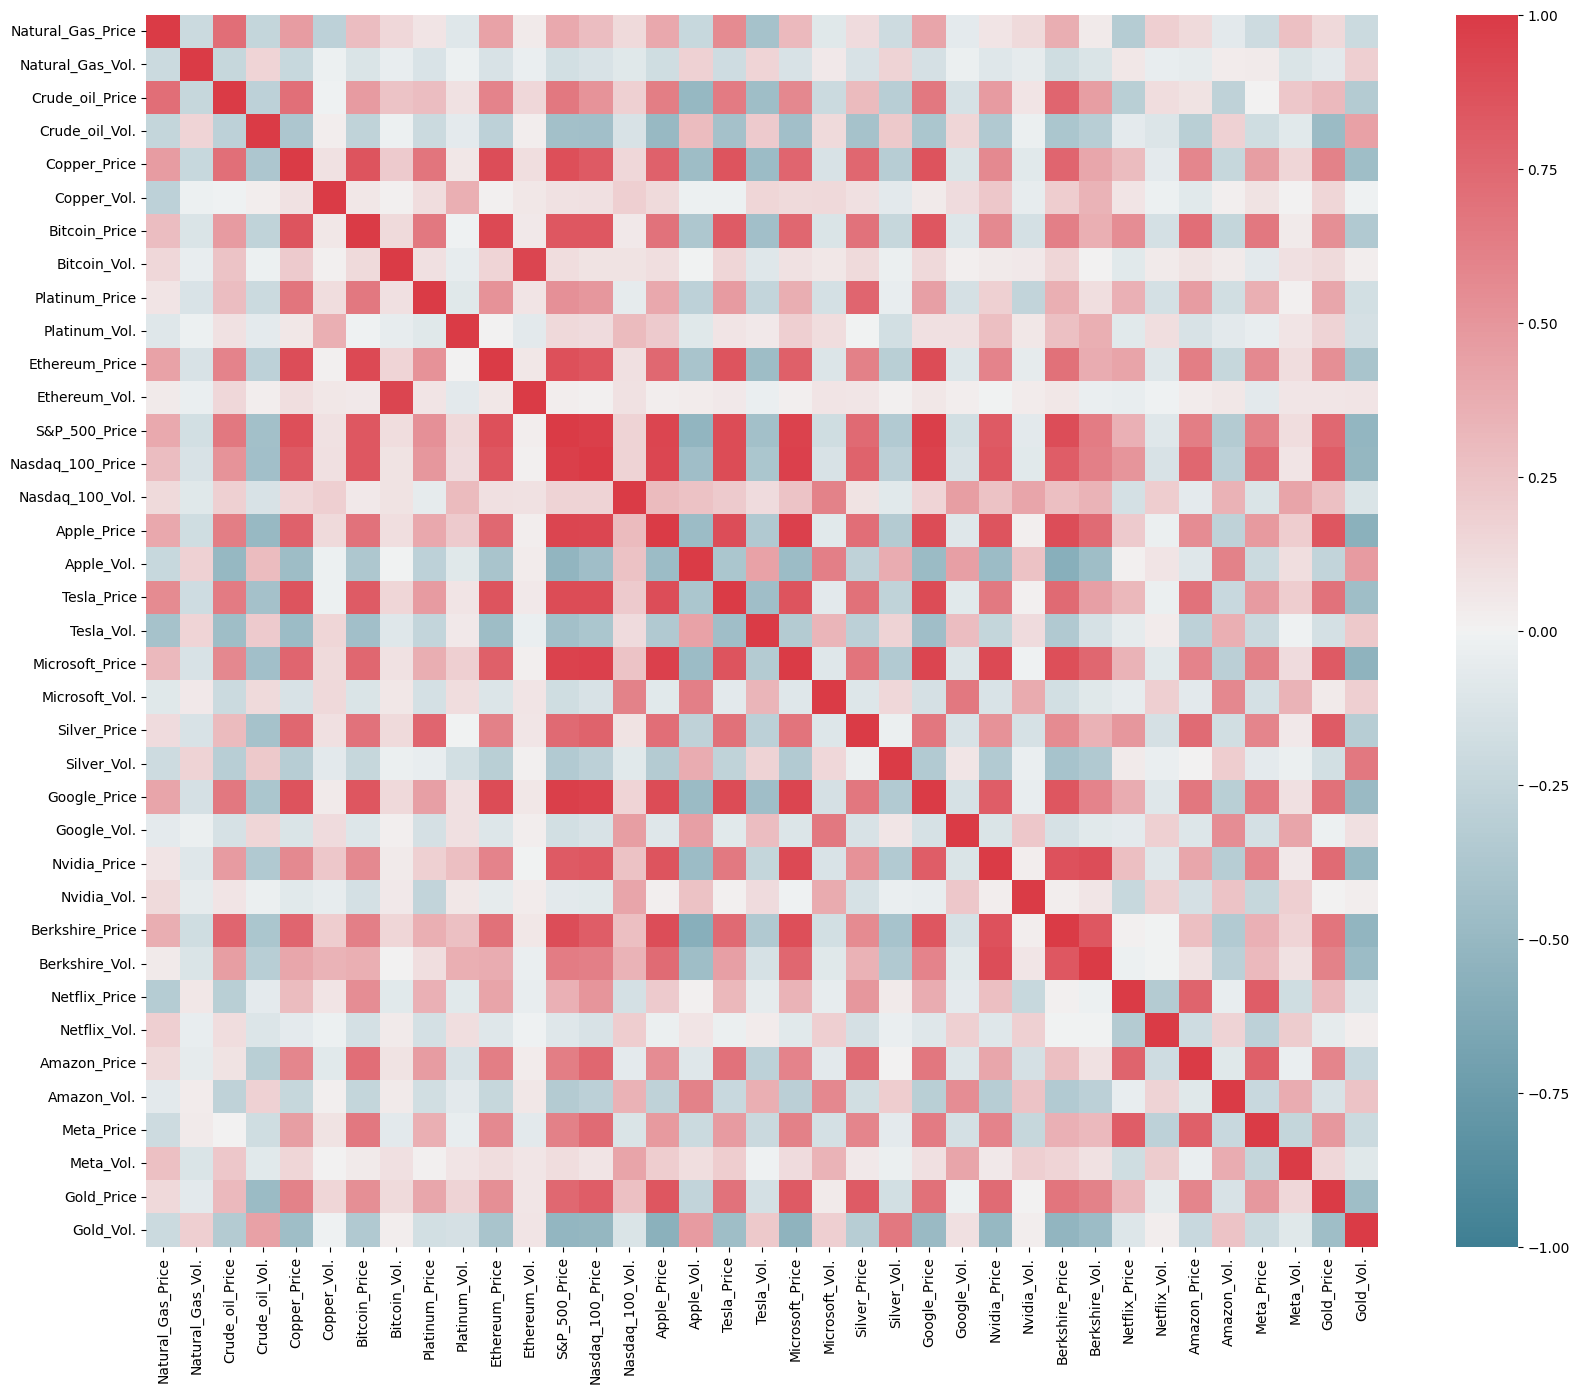

In [ ]:
# finding Correlation btw each cols
f, ax = plt.subplots(figsize=(20, 16))
corr = df[mainCols].corr()
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

In [ ]:
df.head()

,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,Platinum_Price,...,Gold_Price,Gold_Vol.,year,month,monthName,day,dayOfWeek,dayName,week,quater
0,2024-02-02,2.079,133575,72.28,370467,3.8215,50531,43194.7,42650.0,901.6,...,2053.7,212040,2024,2,February,2,4,Friday,5,1
1,2024-02-01,2.050,161340,73.82,577940,3.8535,26666,43081.4,47690.0,922.3,...,2071.1,260920,2024,2,February,1,3,Thursday,5,1
2,2024-01-31,2.100,142860,75.85,344490,3.9060,59983,42580.5,56480.0,932.6,...,2067.4,238370,2024,1,January,31,2,Wednesday,5,1
3,2024-01-30,2.077,139750,77.82,347240,3.9110,39943,42946.2,55130.0,931.7,...,2050.9,214590,2024,1,January,30,1,Tuesday,5,1
4,2024-01-29,2.490,3590,76.78,331930,3.8790,16468,43299.8,45230.0,938.3,...,2034.9,1780,2024,1,January,29,0,Monday,5,1


In [ ]:
def groupbyOperation(dataFrame,timeCol,valueCol,agger):
  return dataFrame.groupby(timeCol)[valueCol].apply(agger)

def print_barplot(data):
  # f, ax = plt.subplots(figsize=(5, 4))
  plt.figure()
  sns.barplot(data)


<ipython-input-56-19eaf524707d>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


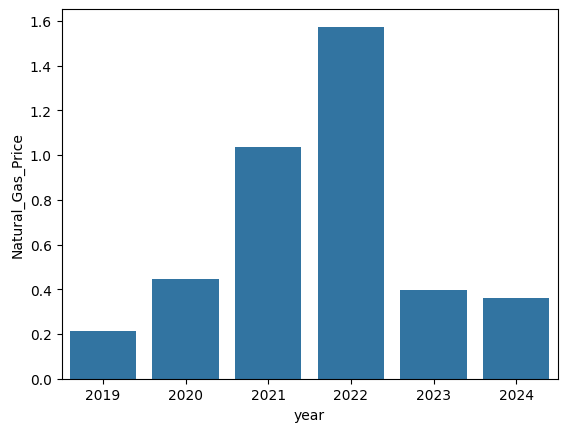

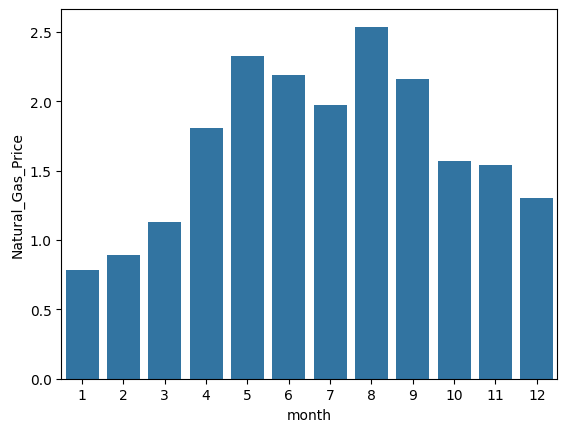

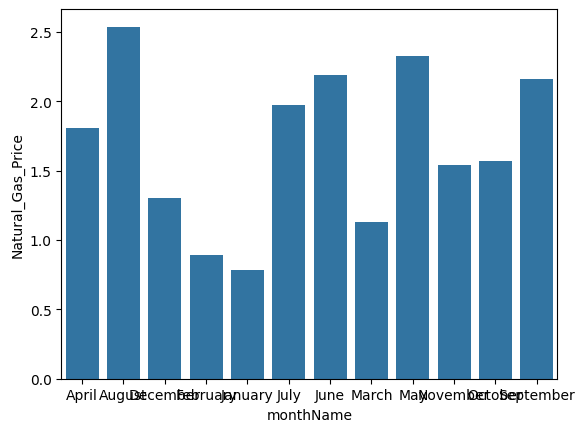

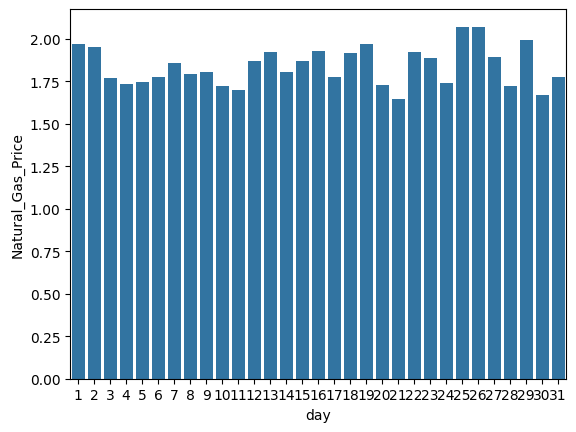

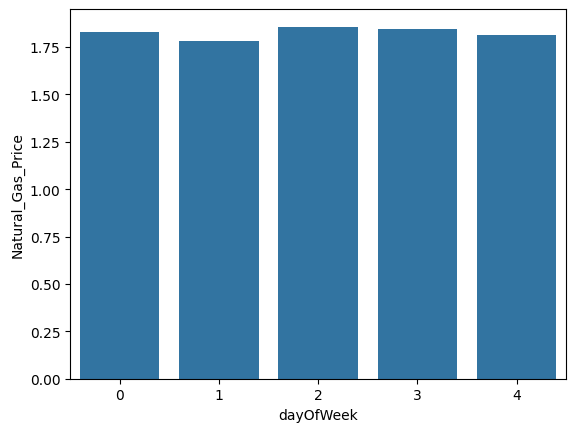

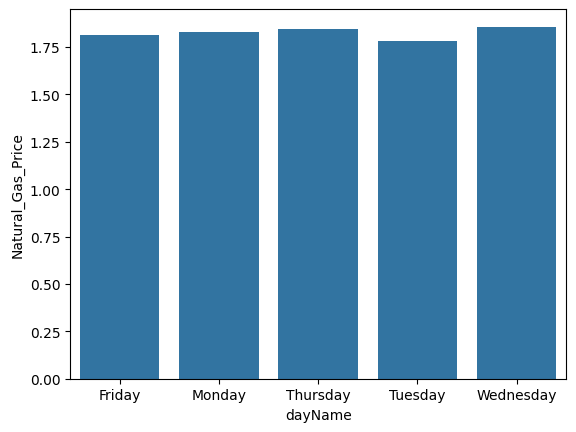

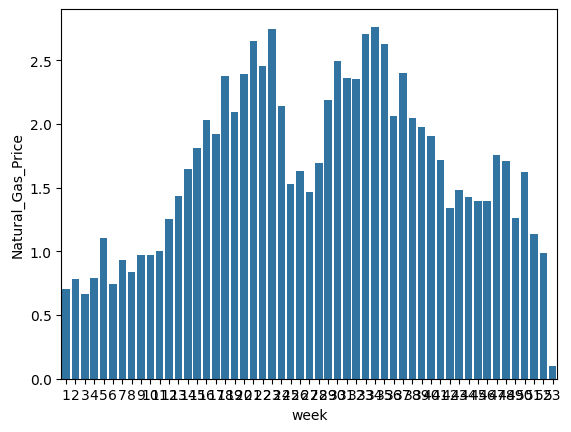

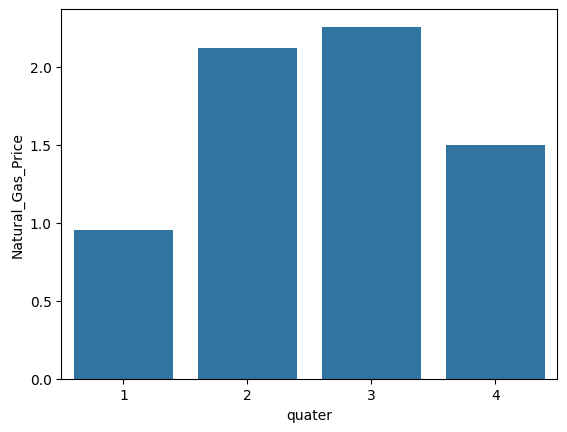

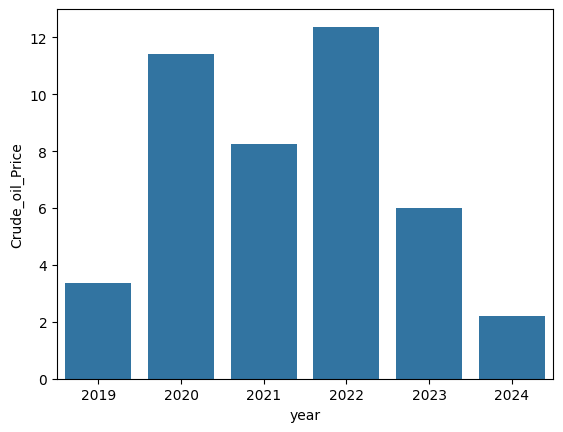

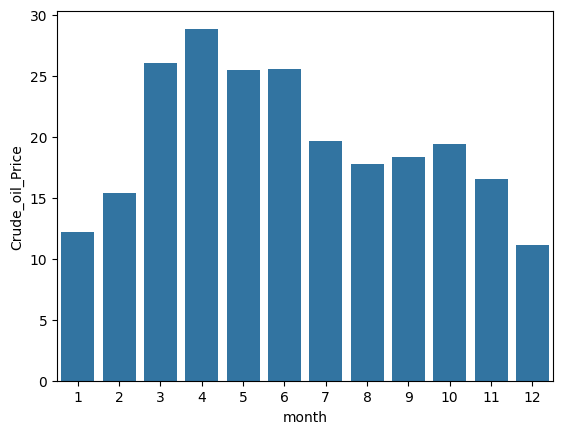

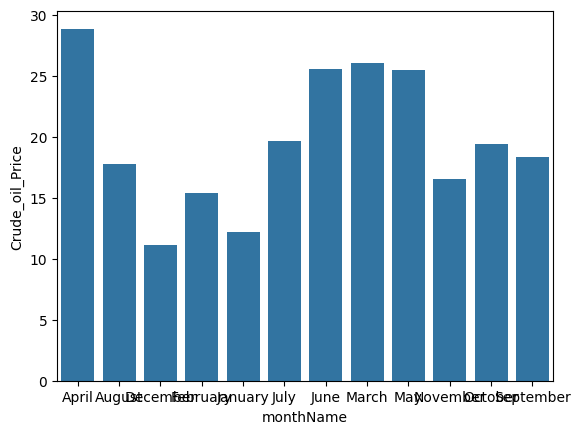

Error in callback <function flush_figures at 0x79ad77c901f0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
timeCols = ['year',	'month' ,	'monthName',	'day' ,	'dayOfWeek' ,	'dayName' ,	'week' ,	'quater']
priceCols = ['Natural_Gas_Price',  'Crude_oil_Price',
             'Copper_Price',  'Bitcoin_Price',
        'Platinum_Price', 'Ethereum_Price',
        'S&P_500_Price', 'Nasdaq_100_Price',
       'Apple_Price',  'Tesla_Price',
       'Microsoft_Price',  'Silver_Price',
       'Google_Price', 'Nvidia_Price',
       'Berkshire_Price',  'Netflix_Price',
       'Amazon_Price',  'Meta_Price',  'Gold_Price']
for i in priceCols:
  for j in timeCols:
    print_barplot(groupbyOperation(df,j,i,'std'))